<a href="https://colab.research.google.com/github/Saksit-Jittasopee/Git-Lesson/blob/main/PyTorch_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 0: PyTorch Fundamentals 101

In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Introduction to Tensors

### Creating Tensors

#### PyTorch Tensor Created using `torch.tensor()`

In [2]:
# Scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [3]:
# Return Input
scalar.ndim

# Return Scalar Length
scalar.item()

7

In [4]:
# Vector
vector = torch.tensor([7,7])
vector

tensor([7, 7])

In [5]:
# Return Input
vector.ndim

# Return Vector Length
vector.shape

torch.Size([2])

In [6]:
# Matrix
matrix = torch.tensor([[7,8], [9,10]])
matrix

tensor([[ 7,  8],
        [ 9, 10]])

In [7]:
# Return Input
matrix.ndim

# Return Value by Index
matrix[0]

tensor([7, 8])

In [8]:
# Tensor
tensor = torch.tensor([[[1,2,3]], [[3,4,5]]])
tensor

tensor([[[1, 2, 3]],

        [[3, 4, 5]]])

In [9]:
# Return Input
tensor.ndim

# Return Value of Index (Dimension Count)
tensor.shape

torch.Size([2, 1, 3])

### Random Tensors

Random Tensors are important because the way many neural networks learn is that they start with tensors full of random numbers and then adjust those random numbers to better represent the data.

In [10]:
# Random Tensors
random_tensor = torch.rand(3, 4)
print(random_tensor)

# Zeros and Ones
zeros = torch.zeros(3, 4)
print(zeros)

ones = torch.ones(3, 4)
print(ones)

tensor([[0.4404, 0.8019, 0.7864, 0.2757],
        [0.8488, 0.6967, 0.7209, 0.5258],
        [0.2393, 0.6963, 0.8100, 0.2298]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [11]:
# Arange
arange = torch.arange(0, 10, 2)
arange

tensor([0, 2, 4, 6, 8])

In [12]:
# Float 32 Tensor
float_32_tensor = torch.tensor([3.0, 6.0, 9.0], dtype=None , device=None, requires_grad=False)
float_32_tensor
# dtype - what datatype is the tensor (e.g. Float32, Float16, etc.)
# device - what device is your tensor on (e.g. GPU, TPU)
# requires_grad - whether or not to track gradients with this tensor operations

tensor([3., 6., 9.])

In [13]:
# Getting Information
print(float_32_tensor)
print(f"Datatype of Tensor: {float_32_tensor.dtype}")
print(f"Shape of Tensor: {float_32_tensor.shape}")
print(f"Device of Tensor: {float_32_tensor.device}")

tensor([3., 6., 9.])
Datatype of Tensor: torch.float32
Shape of Tensor: torch.Size([3])
Device of Tensor: cpu


In [14]:
# Matrix Multiplication
tensor = torch.tensor([1,2,3])
tensor * tensor

tensor([1, 4, 9])

In [15]:
# Merge to one
torch.matmul(tensor, tensor)

tensor(14)

In [16]:
#Comparing for loop and torch function

%%time
value = 0
for i in range(len(tensor)):
    value += tensor[i] * tensor[i]
print(value)

tensor(14)
CPU times: user 0 ns, sys: 848 µs, total: 848 µs
Wall time: 3.82 ms


In [17]:
#Comparing for loop and torch function

%%time
torch.matmul(tensor, tensor)

CPU times: user 665 µs, sys: 0 ns, total: 665 µs
Wall time: 819 µs


tensor(14)

In [18]:
# Transpose
tensor_a = torch.tensor([[1,2,4],[5,3,9]])
tensor_a.T

tensor([[1, 5],
        [2, 3],
        [4, 9]])

In [19]:
# Find The Min
torch.min(tensor_a)

tensor(1)

In [20]:
# Find The Max
torch.max(tensor_a)

tensor(9)

In [21]:
# Find The Mean
torch.mean(tensor_a.type(torch.float32))

tensor(4.)

In [22]:
# Find The Sum
torch.sum(tensor_a)

tensor(24)

In [23]:
# Find The Position in Tensor that has the min value and return index
tensor_a.argmin()

tensor(0)

In [24]:
# Find The Position in Tensor that has the max value and return index
tensor_a.argmax()

tensor(5)

# Reshaping, Stacking, Squeezing, and Unsqueezing tensors

* Reshaping - reshapes an input tensor to a defined shape

* View - return a view of an input tensor of certain shape but keep the same memory as the original tensor

* Stacking - combine multiple tensors on top of each other (vstack - vertical) or side by side (hstack - horizontal)

* Squeezing - removes all `1` dimension from a tensor

* Unsqueezing - add a `1` dimension to a target tensor

* Permute - return a view of the input with dimensions permuted (swapped) in a certain way

In [25]:
# Create tensor x
x = torch.arange(1., 10.)
x

tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [26]:
# Reshape into row and column 3x3
x_reshaped = x.reshape(3, 3)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]]),
 torch.Size([3, 3]))

In [27]:
# Changing z changes x (because a view of tensor share the memory of the original)
z = x.view(1,9)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [28]:
# Stack tensors on top of each other
x_stacked = torch.stack([x, x, x, x], dim=0)
x_stacked

tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.],
        [1., 2., 3., 4., 5., 6., 7., 8., 9.],
        [1., 2., 3., 4., 5., 6., 7., 8., 9.],
        [1., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [29]:
# Squeeze - torch.squeeze() - Returns a tensor with all specified dimensions of input of size 1 removed
x = torch.zeros(2, 1, 2, 1, 2)
y = torch.squeeze(x)
y.size()

torch.Size([2, 2, 2])

In [30]:
# Squeeze - 0
y = torch.squeeze(x, 0)
y.size()

torch.Size([2, 1, 2, 1, 2])

In [31]:
# Squeeze - 1
y = torch.squeeze(x, 1)
y.size()

torch.Size([2, 2, 1, 2])

In [32]:
# Squeeze - 1,2,3
y = torch.squeeze(x, (1, 2, 3))
y.size()

torch.Size([2, 2, 2])

In [33]:
# Unsqueeze - torch.squeeze() - Returns a new tensor with a dimension of size one inserted at the specified position
x = torch.tensor([1, 2, 3, 4])
y = torch.unsqueeze(x, 1)
y.size()

torch.Size([4, 1])

In [34]:
#Permute - torch.permute() - Returns a view of the original tensor input with its dimensions permuted (used with images) sorted by index
x = torch.randn(2, 3, 5)
torch.permute(x, (2, 0, 1)).size()

torch.Size([5, 2, 3])

## Indexing (Selecting data from tensors)
Indexing with PyTorch is similar with NumPy.

In [35]:
# Index
x = torch.arange(1,10).reshape(1,3,3)
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [36]:
# Index
x[0][0]

tensor([1, 2, 3])

In [37]:
# Index
x[0][0][0]

tensor(1)

In [38]:
# You can also use ":" to select all of a target dimension
x[:, 0]

tensor([[1, 2, 3]])

In [39]:
x[:, :, 1]

tensor([[2, 5, 8]])

## PyTorch tensors & NumPy

NumPy is a popular scientific Python numerical computing library.
PyTorch has functionality to interact with it.

* Data in NumPy, want in PyTorch tensor -> `torch.from_numpy(ndarray)`
* PyTorch tensor -> NumPy -> `torch.Tensor.numpy()`

In [40]:
# Numpy array to tensor

array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array) # pytorch reflects numpys default data type (float 64) unless we assigned it differently
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [41]:
# Tensor to NumPy array
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

## Reproducibility (trying to take random out of random)

start with random numbers -> tensor operations -> update random numbers to try and make them better representations of the data -> again -> again -> again..

To reduce randomness in nueral networks and PyTorch comes the concept of **random seed**.

Essentially what the random seed does is "flavour" the randomness.

In [42]:
# Create two random tensors
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(random_tensor_A)
print(random_tensor_B)

tensor([[0.0613, 0.6622, 0.3753, 0.2534],
        [0.0350, 0.5403, 0.3574, 0.5664],
        [0.8432, 0.0773, 0.5440, 0.3710]])
tensor([[0.0317, 0.1194, 0.1488, 0.5245],
        [0.0465, 0.1760, 0.1060, 0.7938],
        [0.6116, 0.1052, 0.6032, 0.5882]])


In [43]:
# Check GPU Access with PyTorch
import torch
torch.cuda.is_available()

True

In [44]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [45]:
# Count number of device
torch.cuda.device_count()

1

# Chapter 1: PyTorch Workflows

In [46]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [47]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.9.0+cu126'

In [48]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)
#### Let's create a training and test set with our data

In [49]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [50]:
# Visualization
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

  plt.figure(figsize=(10, 7))

  # Scatterplot Training Data
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Scatterplot Testing Data
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Scatterplot Predictions
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

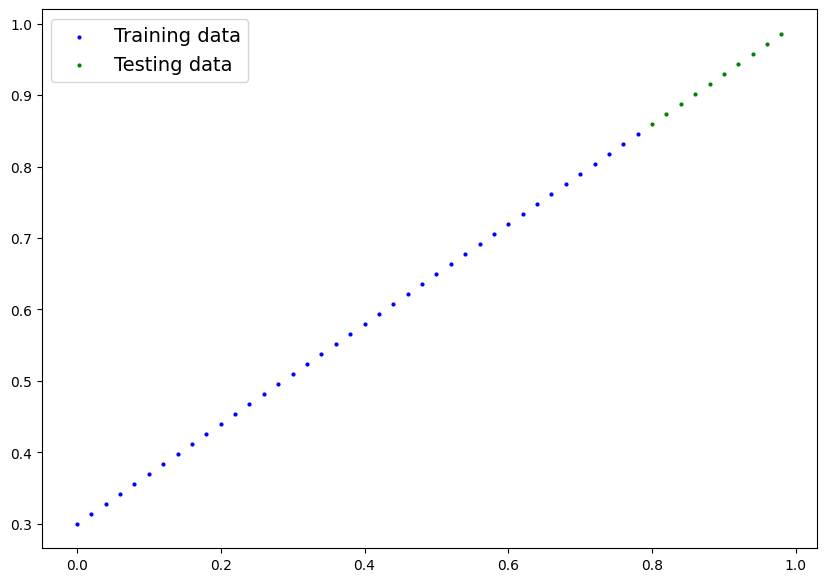

In [51]:
# Graph
plot_predictions();

In [52]:
# Building Model

# Create Linear Regression Model in PyTorch
class LinearRegressionModel(nn.Module): # <- Almost everything in PyTorch inherit from nn.module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # <- This is the linear regression formula


## Two Main Algorithm

### 1. Gradient Descent
### 2. Backpropagation

### PyTorch building essentials
* torch.nn - contains all of PyTorch's building blocks for neural networks
* torch.nn.Parameters - what parameters should our models try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - the base class for all Neural Network modules, if you subclass it, you should overwrite forward()
* torch.optim - contains a variety of optimization algorithms
* torch.nn.functional - contains activation functions, loss functions, and more


In [53]:
# Create random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of the nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [54]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using  `torch.inference_mode()`

To check our model's predictive power, let's see how it's predicts y_test based on  `X_test`.

When we pass data through our model, it's going to run through the `forward()` method.

In [55]:
# Make prediction with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [56]:
# To see if it's closed
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

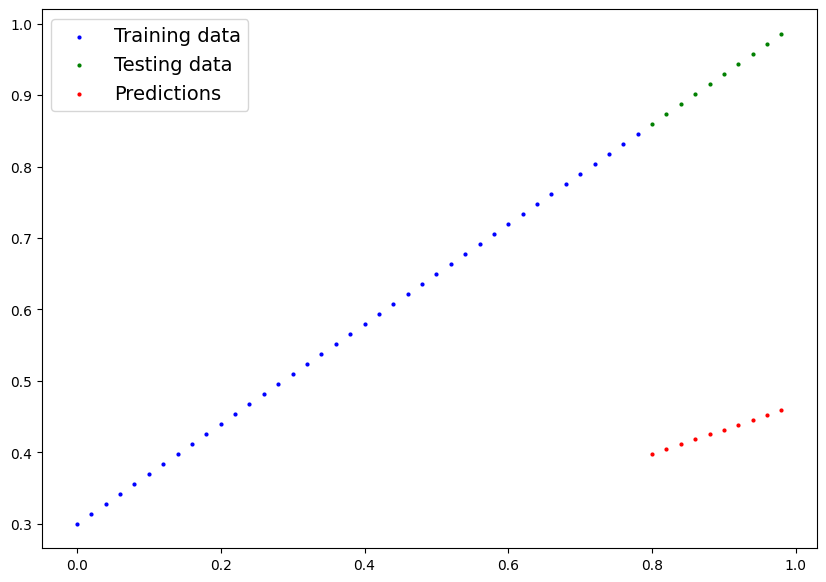

In [57]:
plot_predictions(predictions=y_preds)

In [58]:
# You can also do something similar with torch.no_grad(), how ever torch.inference_mode() is preferred.
with torch.no_grad():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

## Train Model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some known parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models prediction are is to use a loss function.

* **Note:** Loss Function may be called cost function or criterion.

* **Lost Function:** is to measure how poor or how wrong your models prediction are.

* **Optimizer:** takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case) to improve the loss function.

And specifically for PyTorch we need:
* A training loop
* A testing loop

In [59]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [60]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

### Building a training loop and testing loop in PyTorch

A couple thing we need in training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with the respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the lost (**gradient descent**)

In [61]:
# An epochs is one loop through the data
epochs = 100 # Train 100 Times

## Track Different Values
epoch_count = []
train_loss_values = []
test_loss_values = []

## Training

# 0. Loop through the data
for epoch in range (epochs):
  # set the model to training mode
  model_0.train() # train mode in PyTorch set

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

### Testing
  model_0.eval() # turns off different settings in the model
  with torch.inference_mode(): # turns off gradient tracking [with torch.no_grad() is used in older PyTorch code]
  # 1. Do the forward press
    test_pred = model_0(X_test)
  # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0: # Print every 10 epoch
    epoch_count.append(epoch)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}") # Loss Less = Good

  # print out model state_dict()
  #print(f"Epoch: {epoch} | Loss: {loss}")
  print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
OrderedDict({'weights': tensor([0.3445]), 'bias': tensor([0.1488])})
OrderedDict({'weights': tensor([0.3484]), 'bias': tensor([0.1588])})
OrderedDict({'weights': tensor([0.3523]), 'bias': tensor([0.1688])})
OrderedDict({'weights': tensor([0.3562]), 'bias': tensor([0.1788])})
OrderedDict({'weights': tensor([0.3601]), 'bias': tensor([0.1888])})
OrderedDict({'weights': tensor([0.3640]), 'bias': tensor([0.1988])})
OrderedDict({'weights': tensor([0.3679]), 'bias': tensor([0.2088])})
OrderedDict({'weights': tensor([0.3718]), 'bias': tensor([0.2188])})
OrderedDict({'weights': tensor([0.3757]), 'bias': tensor([0.2288])})
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict({'weights': tensor([0.3796]), 'bias': tensor([0.2388])})
OrderedDict({'weights': tensor([0.3835]), 'bias': tensor([0.2488])})
OrderedDict({'weights': tensor([0

In [62]:
weight, bias

(0.7, 0.3)

In [63]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [64]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

y_preds_new

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

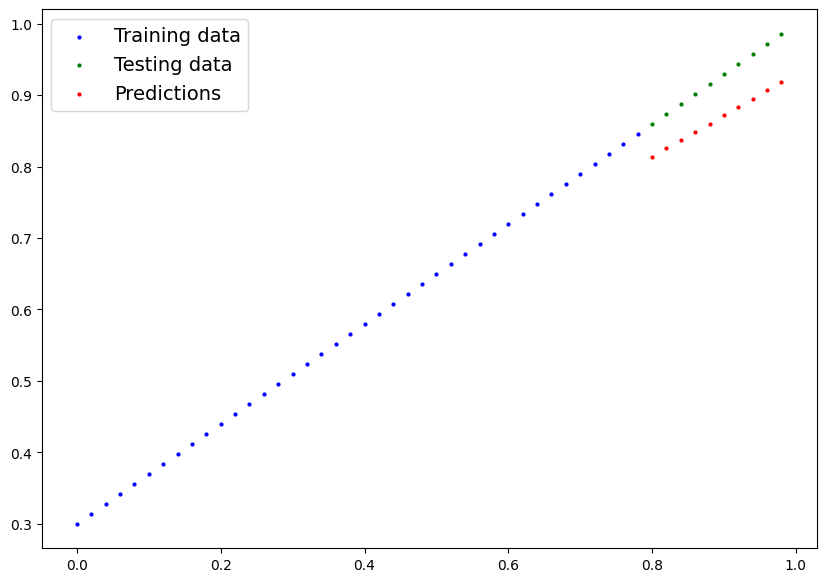

In [65]:
plot_predictions(predictions=y_preds_new)

/tmp/ipython-input-1629894080.py:2: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  plt.plot(epoch_count, np.array(torch.tensor(train_loss_values).numpy()), label="Train loss")


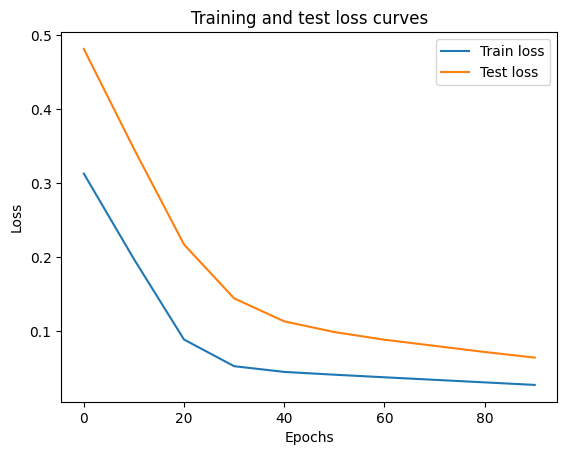

In [66]:
# Plot the loss curve
plt.plot(epoch_count, np.array(torch.tensor(train_loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [67]:
import numpy as np
np.array(torch.tensor(train_loss_values).cpu())

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ],
      dtype=float32)

## Saving a model in PyTorch

1. `torch.save()` - allows you save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state directory

In [68]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. Save model_state_dict()
print(f'Saving Model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving Model to: models/01_pytorch_workflow_model.pth


In [69]:
# Check files privilege
! ls -l models

total 4
-rw-r--r-- 1 root root 2101 Feb  1 06:13 01_pytorch_workflow_model.pth


## Loading PyTorch model
Since we saved our model's `state_dict()` rather than entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [70]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Put the loaded model into evaluation mode (Made predictions with our loaded model)
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [71]:
# Make some model preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [72]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Putting it all together
Let's go back through the steps above and see it all in one place.

In [73]:
# Import PyTorch and Matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check Torch Version
torch.__version__

'2.9.0+cu126'

In [74]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using device: {device}')

Using device: cuda


In [75]:
# Create some data using Linear Regression formula of y = weight  * x + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

# Create train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [76]:
# Plot the data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

  plt.figure(figsize=(10, 7))

  # Scatterplot Training Data
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Scatterplot Testing Data
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Scatterplot Predictions
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

## Building a PyTorch linear model

In [77]:
# Create linear model by suclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # use nn.Linear for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [78]:
# Setup Loss function
loss_fn = nn.L1Loss()

# Setup Optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [79]:
# Training Loop
torch.manual_seed(42)

epochs = 200

epoch_count = []
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model_1.train()

  # Forward pass
  y_pred = model_1(X_train)

  # Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Loss backward (backpropagation)
  loss.backward()

  # Optimizer step
  optimizer.step()

  # Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print every 10 epoch
  if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

  # print out model state_dict()
  #print(f"Epoch: {epoch} | Loss: {loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test Loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test Loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test Loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test Loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test Loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test Loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test Loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test Loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test Loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test Loss: 0.01380180753767

## Making & Evaluating Data

In [80]:
# Turn Model into evaluation mode
model_1.eval()

# Turn on inference context manager
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

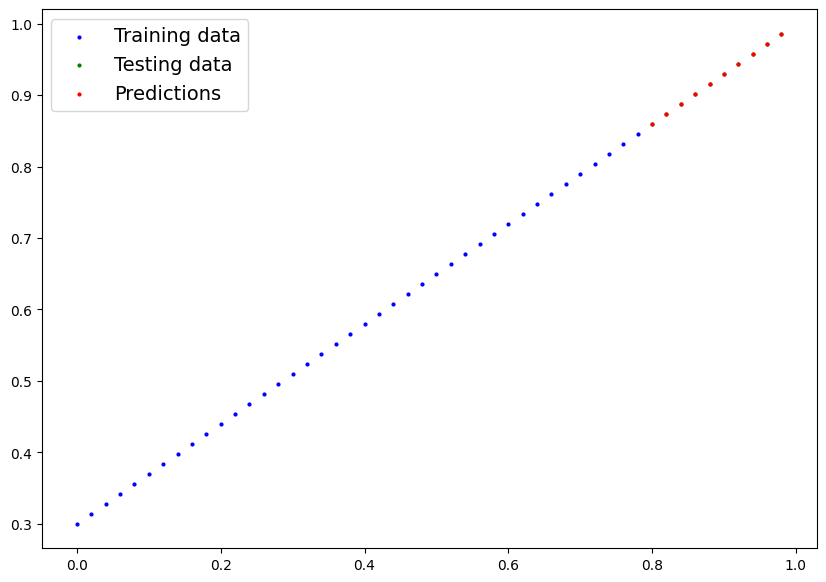

In [81]:
# Check out our model prediction visually
plot_predictions(predictions=y_preds)

## Saving & loading a trained model

In [82]:
from pathlib import Path

# Create Model Directory
MODEL_Path = Path("models")
MODEL_Path.mkdir(parents=True, exist_ok=True)

# Create Model Save Path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_Path / MODEL_NAME

# Save Model State Dict
print(f"Save model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Save model to: models/01_pytorch_workflow_model_1.pth


In [83]:
# Load a PyTorch Model

# Create a new instance of linear regression model v2
#loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
#loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Put the loaded model into device
#loaded_model_1.to(device)

# Put the loaded model into evaluation mode
#loaded_model_1.eval()
#with torch.inference_mode():
  #loaded_model_preds = loaded_model_1(X_test)

#y_preds == loaded_model_preds

# Chapter 2: Neural Network Classification

In [84]:
import sklearn
from sklearn.datasets import make_circles

# Make 100 samples
n_samples = 1000

# Create circle
X, y = make_circles(n_samples, noise=0.03, random_state=42)

len(X), len(y)

(1000, 1000)

In [85]:
print(f"First 5 sample of X : {X[:5]}")
print(f"First 5 sample of y : {y[:5]}")

First 5 sample of X : [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 sample of y : [1 1 1 1 0]


In [86]:
# Make DataFrames of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                       "X2": X[:, 1],
                       "label": y})
circles

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


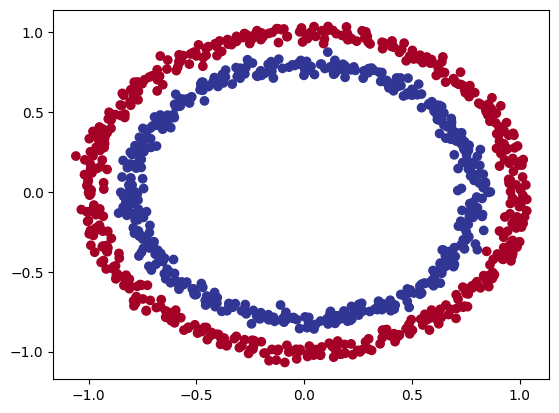

In [87]:
# Visualize
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [88]:
X_sample = X[0]
Y_sample = y[0]

X_sample, Y_sample

(array([0.75424625, 0.23148074]), np.int64(1))

In [89]:
import torch
torch.__version__

'2.9.0+cu126'

In [90]:
# Turn data into sensors
#X = torch.from_numpy(X).type(torch.float)
#y = torch.from_numpy(y).type(torch.float)
type(X), X.dtype, y.dtype

(numpy.ndarray, dtype('float64'), dtype('int64'))

In [91]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [93]:
# cuda check
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [94]:
# build a model
from sklearn import datasets
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features=1)
    )

  def forward(self ,x):
    return self.layer_2(self.layer_1(x))

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [95]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [96]:
print("")